In [ ]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3457  100  3457    0     0  17995      0 --:--:-- --:--:-- --:--:-- 18099


add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
INFO:conda_installer:add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
python version: 3.10.12
INFO:conda_installer:python version: 3.10.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
INFO:conda_installer:fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
INFO:conda_installer:done
installing miniconda to /root/miniconda
INFO:conda_installer:installing miniconda to /root/miniconda
done
INFO:conda_installer:done
installing openmm, pdbfixer
INFO:conda_installer:installing openmm, pdbfixer
added conda-forge to channels
INFO:conda_installer:added conda-forge to channels
done
INFO:conda_installer:done
conda packages installation finished!
INFO:conda_installer:conda packages installation finished!


# conda environments:
#
base                     /root/miniconda



In [ ]:
!pip install --pre deepchem
!pip install propy3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.3/290.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import deepchem as dc
import os
from deepchem.utils import download_url
data_dir = dc.utils.get_data_dir()
download_url("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/pucci-proteins-appendixtable1.csv",dest_dir=data_dir)
print('Dataset Dowloaded at {}'.format(data_dir))
dataset_file = os.path.join(data_dir, "pucci-proteins-appendixtable1.csv")

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Dataset Dowloaded at /tmp


In [ ]:
import pandas as pd
data = pd.read_csv(dataset_file)
data

,Unnamed: 0,N,PDBid,Chain,RESN,RESwt,RESmut,ΔTmexp,Tmexp [wt],ΔΔHmexp,...,ΔΔGexp(T),T,Nres,R (Å),Protein,Organism,Ref.,pH,Exp.Tech.,
0,NaN,1,1aky,A,8,VAL,ILE,-1.5,47.6,70,...,5.0,25,220,1.63,ADK,Yeast,[1],[7.5],FL,NaN
1,NaN,2,1aky,A,48,GLN,GLU,-1.3,47.6,60,...,4.0,25,220,1.63,ADK,Yeast,[1],[7.7],FL,NaN
2,NaN,3,1aky,A,77,THR,HIS,-1.1,47.6,130,...,9.0,25,220,1.63,ADK,Yeast,[1],[7.5],FL,NaN
3,NaN,4,1aky,A,110,THR,HIS,-4.8,47.6,165,...,11.0,25,220,1.63,ADK,Yeast,[1],[7.6],FL,NaN
4,NaN,5,1aky,A,169,ASN,ASP,-0.6,47.6,140,...,9.0,25,220,1.63,ADK,Yeast,[1],[7.5],FL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,NaN,1622,5pti_m52l,A,15,LYS,SER,-1.3,91.7,-5,...,1.2,25,58,1.00,PTI M52L,Bovine,[232],[3.0],DSC,NaN
1622,NaN,1623,5pti_m52l,A,15,LYS,THR,-1.1,91.7,-9,...,-3.6,25,58,1.00,PTI M52L,Bovine,[232],[3.0],DSC,NaN
1623,NaN,1624,5pti_m52l,A,15,LYS,VAL,-6.3,91.7,4,...,4.7,25,58,1.00,PTI M52L,Bovine,[232],[3.0],DSC,NaN
1624,NaN,1625,5pti_m52l,A,15,LYS,TRP,-7.5,91.7,17,...,8.5,25,58,1.00,PTI M52L,Bovine,[232],[2.5],DSC,NaN


In [ ]:
WT_Tm = data[['PDBid','Tmexp [wt]']]
WT_Tm.set_index('PDBid',inplace=True)
WT_Tm

,Tmexp [wt]
PDBid,
1aky,47.6
1aky,47.6
1aky,47.6
1aky,47.6
1aky,47.6
...,...
5pti_m52l,91.7
5pti_m52l,91.7
5pti_m52l,91.7


In [ ]:
dict_WT_TM = {}
for k,v in WT_Tm.itertuples():
    if(k not in dict_WT_TM):
        dict_WT_TM[k]=float(v)

In [ ]:
pdbs = data[data['PDBid'].str.len()<5]
pdbs = pdbs[pdbs['Chain'] == "A"]
pdbs[['RESN','RESwt','RESmut']]

,RESN,RESwt,RESmut
0,8,VAL,ILE
1,48,GLN,GLU
2,77,THR,HIS
3,110,THR,HIS
4,169,ASN,ASP
...,...,...,...
1604,36,GLY,ALA
1605,36,GLY,SER
1606,37,GLY,ALA
1607,39,ARG,ALA


In [ ]:
alls=[]
for resnum,wt in pdbs[['RESN','RESwt','RESmut','PDBid','ΔTmexp']].items():
    alls.append(wt.values)
d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N',
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
resnum=alls[0]
wt=[d[x.strip()] for x in alls[1]] # extract the Wildtype aminoacid with one letter code
mut=[d[x.strip()] for x in alls[2]] # extract the Mutation aminoacid with one letter code
codes=alls[3] # PDB code
tms=alls[4] # Melting temperature

In [ ]:
print("pdbid {}, WT-AA {}, Resnum {}, MUT-AA {},DeltaTm {}".format(codes[0],wt[0],resnum[0],mut[0],tms[0]))

pdbid 1aky, WT-AA V, Resnum 8, MUT-AA I,DeltaTm -1.5


#**PDB DOWNLOAD**

In [ ]:
from pdbfixer import PDBFixer
from simtk.openmm.app import PDBFile
!mkdir PDBs

In [ ]:
import os
import time
t0 = time.time()

downloaded = os.listdir("PDBs")
PDBs_ids= set(pdbs['PDBid'])
pdb_list = []
print("Start Download ")
for pdbid in PDBs_ids:
    name=pdbid+".pdb"
    if(name in downloaded):
        continue
    try:
        fixer = PDBFixer(pdbid=pdbid)
        fixer.findMissingResidues()
        fixer.findNonstandardResidues()
        fixer.replaceNonstandardResidues()
        fixer.removeHeterogens(True)
        fixer.findMissingAtoms()
        fixer.addMissingAtoms()
        PDBFile.writeFile(fixer.topology, fixer.positions, open('./PDBs/%s.pdb' % (pdbid), 'w'),keepIds=True)
    except:
        print("Problem with {}".format(pdbid))
print("Total Time {}".format(time.time()-t0))

Start Download 
Total Time 710.4260959625244


In [ ]:
import re
def MutateSeq(seq,Mutant):
    '''
    Mutate a sequence based on a string (Mutant) that has the notation :
    A###B where A is the wildtype aminoacid ### the position and B the mutation
    '''
    aalist = re.findall('([A-Z])([0-9]+)([A-Z])', Mutant)

    #(len(aalist)==1):
    newseq=seq
    listseq=list(newseq)
    for aas in aalist:
        wildAA = aas[0]
        pos = int(aas[1]) -1
        if(pos >= len(listseq)):
            print("Mutation not in the range of the protein")
            return None
        MutAA = aas[-1]

        if(listseq[pos]==wildAA):

            listseq[pos]=MutAA

        else:
            #print("WildType AA does not match")
            return None
    return("".join(listseq))

In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.1 MB/s eta 0:00:00


In [ ]:
import Bio

In [ ]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
ppb=PPBuilder()
def GetSeqFromPDB(pdbid):
    structure = PDBParser().get_structure(pdbid.split(".")[0], 'PDBs/{}'.format(pdbid))
    seqs=[]
    return ppb.build_peptides(structure)

In [ ]:
import warnings; warnings.simplefilter('ignore')
test="1ezm"
print(test)
seq = GetSeqFromPDB("{}.pdb".format(test))[0].get_sequence()
print("Original Sequence")
print(seq)

1ezm
Original Sequence
AEAGGPGGNQKIGKYTYGSDYGPLIVNDRCEMDDGNVITVDMNSSTDDSKTTPFRFACPTNTYKQVNGAYSPLNDAHFFGGVVFKLYRDWFGTSPLTHKLYMKVHYGRSVENAYWDGTAMLFGDGATMFYPLVSLDVAAHEVSHGFTEQNSGLIYRGQSGGMNEAFSDMAGEAAEFYMRGKNDFLIGYDIKKGSGALRYMDQPSRDGRSIDNASQYYNGIDVHHSSGVYNRAFYLLANSPGWDTRKAFEVFVDANRYYWTATSNYNSGACGVIRSAQNRNYSAADVTRAFSTVGVTCPSAL


In [ ]:
informSeq=GetSeqFromPDB(test+".pdb")[0].__repr__()
print("Seq information",informSeq)
start = re.findall('[0-9]+',informSeq)[0]
print("Reported Mutation {}{}{}".format("R",179,"A"))
numf =179 - int(start) + 1  # fix some cases of negative aminoacid numbers

Seq information <Polypeptide start=1 end=301>
Reported Mutation R179A


In [ ]:
mutfinal = "R{}A".format(numf)
print("Real Mutation = ",mutfinal)
mutseq = MutateSeq(seq,mutfinal)
print(mutseq)

Real Mutation =  R179A
AEAGGPGGNQKIGKYTYGSDYGPLIVNDRCEMDDGNVITVDMNSSTDDSKTTPFRFACPTNTYKQVNGAYSPLNDAHFFGGVVFKLYRDWFGTSPLTHKLYMKVHYGRSVENAYWDGTAMLFGDGATMFYPLVSLDVAAHEVSHGFTEQNSGLIYRGQSGGMNEAFSDMAGEAAEFYMAGKNDFLIGYDIKKGSGALRYMDQPSRDGRSIDNASQYYNGIDVHHSSGVYNRAFYLLANSPGWDTRKAFEVFVDANRYYWTATSNYNSGACGVIRSAQNRNYSAADVTRAFSTVGVTCPSAL


In [ ]:
information = {}
count = 1
failures=[]
for code,tm,numr,wt_val,mut_val in zip(codes,tms,resnum,wt,mut):
    count += 1
    seq = GetSeqFromPDB("{}.pdb".format(code))[0].get_sequence()
    mutfinal="WT"
    if("{}-{}".format(code,mutfinal) not in information):
        informSeq=GetSeqFromPDB(code+".pdb")[0].__repr__()
        start = re.findall('[-0-9]+',informSeq)[0]
    if(int(start)<0):
        numf =numr - int(start) # if start is negative 0 is not used as resnumber
    else:
        numf =numr - int(start) + 1
    mutfinal = "{}{}{}".format(wt_val,numf,mut_val)
    mutseq = MutateSeq(seq,mutfinal)
    if(mutseq==None):
        failures.append((code,mutfinal))
        continue
    information["{}-{}".format(code,mutfinal)]=[mutseq,dict_WT_TM[code]-float(tm)]

Mutation not in the range of the protein
Mutation not in the range of the protein
Mutation not in the range of the protein
Mutation not in the range of the protein
Mutation not in the range of the protein
Mutation not in the range of the protein
Mutation not in the range of the protein
Mutation not in the range of the protein
Mutation not in the range of the protein


Deep Learning model


In [ ]:
import deepchem as dc
import tensorflow as tf

In [ ]:
seq_list=[]
deltaTm=[]
for i in information.values():
    seq_list.append(i[0])
    deltaTm.append(i[1])


In [ ]:
max_seq= 0
for i in seq_list:
    if(len(i)>max_seq):
        max_seq=len(i)

OneHotFeaturizer in order to convert protein sequences in numeric arrays

In [ ]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
OneHotFeaturizer = dc.feat.OneHotFeaturizer(codes,max_length=max_seq)
features = OneHotFeaturizer.featurize(seq_list)

In [ ]:
features_vector  = []
for i in range(len(features)):
    features_vector.append(features[i].flatten())

In [ ]:
dc_dataset = dc.data.NumpyDataset(X=features_vector,y=deltaTm)

In [ ]:
dc_dataset

<NumpyDataset X.shape: (1488, 13188), y.shape: (1488,), w.shape: (1488,), task_names: [0]>

In [ ]:
from deepchem import splits
splitter = splits.RandomSplitter()
train, test  = splitter.train_test_split(dc_dataset,seed=42)

In [ ]:
import tensorflow.keras as keras
#from  keras import layers
model = tf.keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=dc_dataset.X.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1),
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                422048    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 423137 (1.61 MB)
Trainable params: 423137 (1.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/30
12/1

<Axes: >

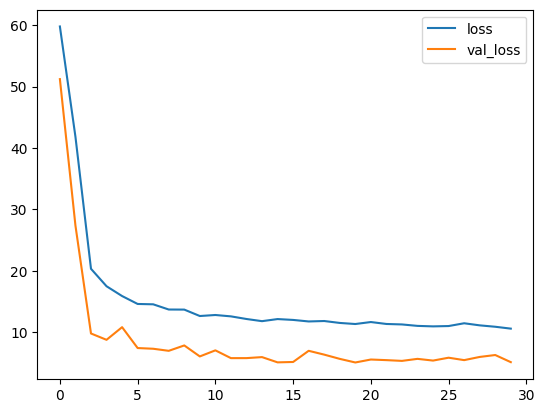

In [ ]:
model.compile(loss='mae', optimizer='adam')

print(model.summary())

history = model.fit(
    train.X, train.y,
    validation_data=(test.X,test.y),
    batch_size=100,
    epochs=30,
)

## perform a plot of loss vs epochs
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()


In [ ]:
model_dc = dc.models.KerasModel(model, dc.models.losses.L1Loss())
model_dc.fit(train)

10.19046401977539

<Axes: >

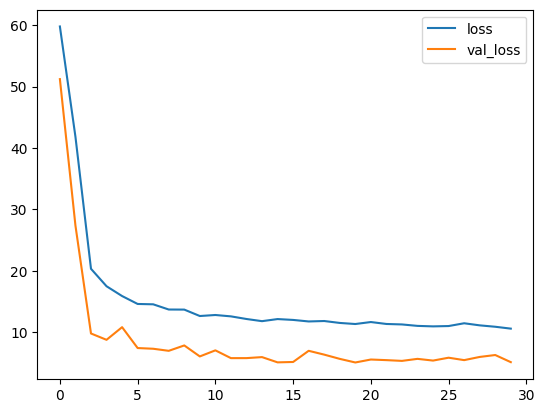

In [ ]:
History_df = pd.DataFrame(model_dc.model.history.history)
History_df[['loss', 'val_loss']].plot()

In [ ]:
#metric values for Keras Model
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print('test dataset R2:', model_dc.evaluate(test, [metric]))

test dataset R2: {'pearson_r2_score': 0.7599158876241887}


ml models


In [ ]:
from propy import PyPro

In [ ]:
import numpy as np
aaComplist = []
CTDList =[]
for seq in seq_list:
    Obj = PyPro.GetProDes(seq)
    aaComplist.append(np.array(list(Obj.GetAAComp().values())))
    CTDList.append(np.array(list(Obj.GetCTD().values())))

In [ ]:
dc_dataset_aacomp = dc.data.NumpyDataset(X=aaComplist,y=deltaTm)
dc_dataset_ctd = dc.data.NumpyDataset(X=CTDList,y=deltaTm)

In [ ]:
from deepchem import splits
splitter = splits.RandomSplitter()
train, test  = splitter.train_test_split(dc_dataset_aacomp,seed=42)
from sklearn.ensemble import RandomForestRegressor
from deepchem.utils.evaluate import Evaluator
import pandas as pd
print("RandomForestRegressor")
seed = 42 # Set a random seed to get stable results
sklearn_model = RandomForestRegressor(n_estimators=100, max_features='sqrt')
sklearn_model.random_state = seed
model = dc.models.SklearnModel(sklearn_model)
model.fit(train)
metric = dc.metrics.Metric(dc.metrics.mae_score)
train_score = model.evaluate(train, [metric])
test_score = model.evaluate(test, [metric])
print("Train score is : {}".format(train_score))
print("Test score is : {}".format(test_score))

RandomForestRegressor
Train score is : {'mae_score': 1.814615638665721}
Test score is : {'mae_score': 3.611564448948649}


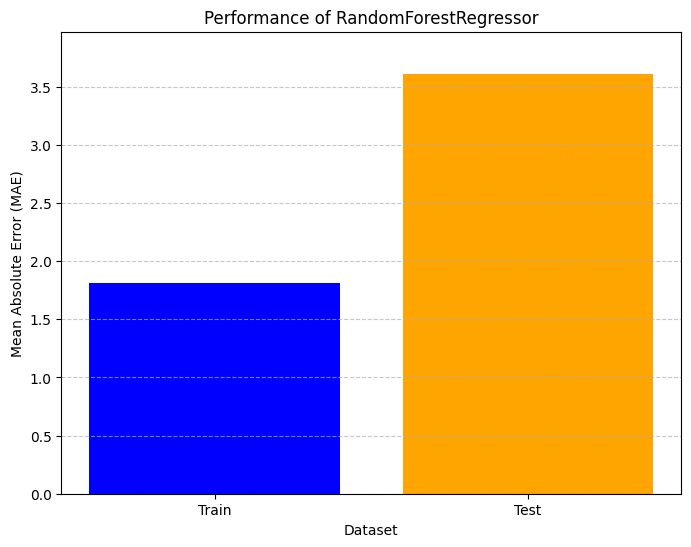

In [ ]:
# Define the scores
train_score = {'mae_score': 1.814615638665721}
test_score = {'mae_score': 3.611564448948649}

# Extract the scores
train_mae = train_score['mae_score']
test_mae = test_score['mae_score']

# Define labels and values
labels = ['Train', 'Test']
mae_scores = [train_mae, test_mae]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, mae_scores, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performance of RandomForestRegressor')
plt.ylim(0, max(mae_scores) * 1.1)  # Set y-axis limit slightly above the maximum value
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("SupportVectorMachineRegressor")
from sklearn.svm import SVR
svr_sklearn = SVR(kernel="poly",degree=4)
svr_sklearn.random_state = seed
model = dc.models.SklearnModel(svr_sklearn)
model.fit(train)
metric = dc.metrics.Metric(dc.metrics.mae_score)
train_score = model.evaluate(train, [metric])
test_score = model.evaluate(test, [metric])
print("Train score is : {}".format(train_score))
print("Test score is : {}".format(test_score))

SupportVectorMachineRegressor
Train score is : {'mae_score': 3.280893858998118}
Test score is : {'mae_score': 3.995064939603877}


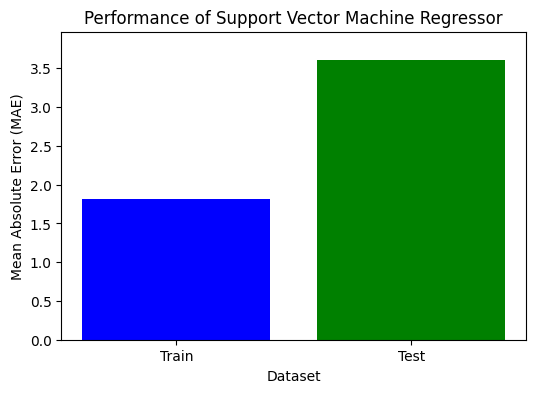

In [ ]:
import matplotlib.pyplot as plt

# Define the labels and scores
labels = ['Train', 'Test']
scores = [train_score['mae_score'], test_score['mae_score']]

# Plot the bar graph
plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performance of Support Vector Machine Regressor')
plt.ylim(0, max(scores) * 1.1)  # Adjust ylim for better visualization
plt.show()
